In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.preprocessing import OneHotEncoder


sb.set()

In [2]:
def train_test_split_func(X,y,test_size): # This function retunrs X_train,X_test,y_train,y_test as a list

    data = list(train_test_split(X,y,test_size=test_size))
    print(f'X_train: {data[0].shape}')
    print(f'X_test: {data[1].shape}')
    print(f'y_train: {data[2].shape}')
    print(f'y_test: {data[3].shape}')

    return data 

In [3]:
def logistic_regression(model,X_train,X_test,y_train,y_test):  # This function returns the y_train_predict and the y_test_predict
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = model.score(X_train,y_train)
    accuracy_test = accuracy_score(y_test,y_test_pred)

    print(f'Train Accuracy: {accuracy_train}')
    print(f" Test Accuracy: {accuracy_test}")
    return y_train_pred,y_test_pred 

In [4]:
def confusion_matrix_func(y_test,y_test_pred):

    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f", annot_kws={"size": 18})

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives 
    fpTest = cmTest[0][1] # False Positives 
    tnTest = cmTest[0][0] # True Negatives 
    fnTest = cmTest[1][0] # False Negatives 

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
    print()

    precision_test_rf = precision_score(y_test,y_test_pred, pos_label = 'Approved')
    recall_test_rf = recall_score(y_test,y_test_pred, pos_label = 'Approved')
    f1_test_rf = f1_score(y_test,y_test_pred, pos_label='Approved')
    print("Precision: {0:.4f}" .format(precision_test_rf)) 
    print("Recall: {0:.4f}" .format(recall_test_rf))
    print("F-score: {0:.4f}" .format(f1_test_rf))


In [5]:
creditcardData = pd.read_csv('credit-approval_csv.csv')
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [6]:
ccData = pd.DataFrame(creditcardData[['Debt','Income','YearsEmployed','CreditScore','Approved_Status']])
ccData.head()

,Debt,Income,YearsEmployed,CreditScore,Approved_Status
0,0.000,0,1.25,1,Approved
1,4.460,560,3.04,6,Approved
2,0.500,824,1.50,0,Approved
3,1.540,3,3.75,5,Approved
4,5.625,0,1.71,0,Approved


In [7]:
ccData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Debt             690 non-null    float64
 1   Income           690 non-null    int64  
 2   YearsEmployed    690 non-null    float64
 3   CreditScore      690 non-null    int64  
 4   Approved_Status  690 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 27.1+ KB


In [24]:
ccData.describe()
ccData.shape

(690, 5)

In [9]:
y = pd.DataFrame(ccData['Approved_Status'])
X = pd.DataFrame(ccData.drop('Approved_Status',axis=1))
y = y.squeeze()

In [10]:
[X_train, X_test, y_train, y_test] = train_test_split_func(X,y,0.3)

X_train: (483, 4)
X_test: (207, 4)
y_train: (483,)
y_test: (207,)


In [11]:
model = LogisticRegression()
y_train_pred,y_test_pred = logistic_regression(model,X_train,X_test,y_train,y_test)

Train Accuracy: 0.7619047619047619
 Test Accuracy: 0.7874396135265701


TPR Test :	 0.8818897637795275
TNR Test :	 0.62882096069869

FPR Test :	 0.37117903930131
FNR Test :	 0.11811023622047244

Precision: 0.8276
Recall: 0.6288
F-score: 0.7146


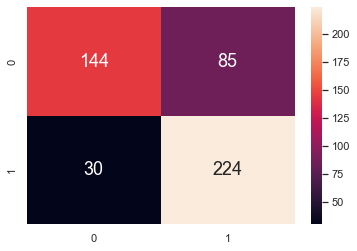

In [12]:
confusion_matrix_func(y_train,y_train_pred)

TPR Test :	 0.8682170542635659
TNR Test :	 0.6538461538461539

FPR Test :	 0.34615384615384615
FNR Test :	 0.13178294573643412

Precision: 0.7500
Recall: 0.6538
F-score: 0.6986


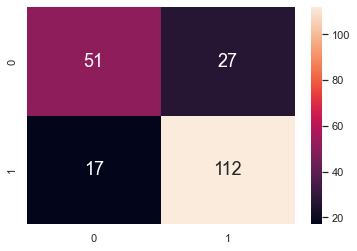

In [13]:
confusion_matrix_func(y_test,y_test_pred)

In [14]:
# y = pd.DataFrame(ccData['Approved_Status'])
# X = pd.DataFrame(ccData.drop(['Approved_Status','Income','Debt','YearsEmployed'],axis=1))
# y = y.squeeze()

In [15]:
# [X_train,X_test,y_train,y_test] = train_test_split_func(X,y,0.2)

In [16]:
# y_train_pred,y_test_pred = logistic_regression(X_train,X_test,y_train,y_test)

In [17]:
# confusion_matrix_func(y_test,y_test_pred)

# Scaled 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[ 1.23116361,  0.89275916, -0.38731455,  1.566535  ],
       [-0.46180728, -0.27691367, -0.67865095, -0.49770122],
       [ 1.23116361, -0.30078455, -0.48491224, -0.49770122],
       ...,
       [-0.6369077 , -0.30078455,  0.02492645, -0.49770122],
       [-0.90306033,  0.5732873 , -0.38731455, -0.49770122],
       [-0.16963973, -0.30078455,  0.77803104, -0.49770122]])

In [21]:
model = LogisticRegression()
y_train_pred,y_test_pred =  logistic_regression(model,X_train_scaled,X_test_scaled,y_train,y_test)

Train Accuracy: 0.7701863354037267
 Test Accuracy: 0.7922705314009661


TPR Test :	 0.8937007874015748
TNR Test :	 0.6331877729257642

FPR Test :	 0.36681222707423583
FNR Test :	 0.1062992125984252

Precision: 0.8430
Recall: 0.6332
F-score: 0.7232


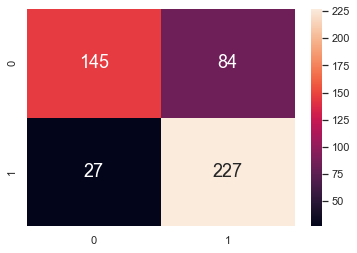

In [22]:
confusion_matrix_func(y_train,y_train_pred)

TPR Test :	 0.8527131782945736
TNR Test :	 0.6923076923076923

FPR Test :	 0.3076923076923077
FNR Test :	 0.14728682170542637

Precision: 0.7397
Recall: 0.6923
F-score: 0.7152


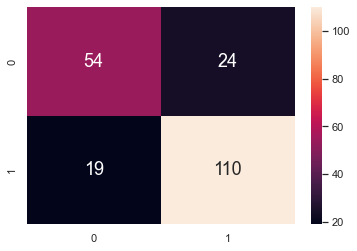

In [23]:
confusion_matrix_func(y_test,y_test_pred)